In [64]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as stats
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

import datetime as dt
from datetime import timezone, timedelta

In [65]:
timezone_offset = -5.0  # Eastern Standard Time (UTC−08:00)
tzinfo = timezone(timedelta(hours=timezone_offset))
current_dateTime = datetime.now(tzinfo)

In [66]:
begin_date = '2024-08-12T00:00:00.000-05:00'
#end_date = '2024-08-14T11:00:00.000-05:00'
end_date = current_dateTime.strftime('%Y-%m-%dT%H:%M:%S.%f%z')


In [67]:
print(end_date)

2024-11-01T08:02:46.899410-0500


In [68]:
print(current_dateTime.strftime('%Y-%m-%dT%H:%M:%S.%f%z'))

2024-11-01T08:02:46.899410-0500


In [69]:
#print(end_date)

In [70]:
#Read in raw stream guage data
#pompton_plains = pd.read_csv('data/archive/pompton_plains.txt', sep='\t', skiprows=27)
pompton_plains = pd.read_csv('https://nwis.waterservices.usgs.gov/nwis/iv/?sites=01388500&parameterCd=00065&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=26)

print (pompton_plains)

pompton_plains = pompton_plains.iloc[1: , :]
pompton_plains['194446_00065'] = pompton_plains['194446_00065'].astype(float)
pompton_plains = pompton_plains[['datetime','194446_00065']]
pompton_plains = pompton_plains.set_index('datetime')
pompton_plains['item_id'] = 'pompton_gage'
pompton_plains.rename(columns={'194446_00065': 'series'}, inplace=True)
pompton_plains.head()

     agency_cd   site_no          datetime tz_cd 194446_00065 194446_00065_cd
0           5s       15s               20d    6s          14n             10s
1         USGS  01388500  2024-08-12 01:00   EDT         9.47               P
2         USGS  01388500  2024-08-12 01:15   EDT         9.47               P
3         USGS  01388500  2024-08-12 01:30   EDT         9.46               P
4         USGS  01388500  2024-08-12 01:45   EDT         9.46               P
...        ...       ...               ...   ...          ...             ...
7803      USGS  01388500  2024-11-01 07:30   EDT         7.78               P
7804      USGS  01388500  2024-11-01 07:45   EDT         7.78               P
7805      USGS  01388500  2024-11-01 08:00   EDT         7.78               P
7806      USGS  01388500  2024-11-01 08:15   EDT         7.78               P
7807      USGS  01388500  2024-11-01 08:30   EDT         7.78               P

[7808 rows x 6 columns]


,series,item_id
datetime,,
2024-08-12 01:00,9.47,pompton_gage
2024-08-12 01:15,9.47,pompton_gage
2024-08-12 01:30,9.46,pompton_gage
2024-08-12 01:45,9.46,pompton_gage
2024-08-12 02:00,9.45,pompton_gage


In [71]:
#pequannock_riverdale = pd.read_csv('data/archive/pequannock_riverdale.txt', sep='\t', skiprows=26)
pequannock_riverdale = pd.read_csv('https://waterservices.usgs.gov/nwis/iv/?sites=01382800&parameterCd=00065&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=26)
pequannock_riverdale = pequannock_riverdale.iloc[1: , :]
pequannock_riverdale['194387_00065'] = pequannock_riverdale['194387_00065'].astype(float)
pequannock_riverdale = pequannock_riverdale[['datetime','194387_00065']]
pequannock_riverdale = pequannock_riverdale.set_index('datetime')
pequannock_riverdale['item_id'] = 'riverdale_gage'
pequannock_riverdale.rename(columns={'194387_00065': 'series'}, inplace=True)
pequannock_riverdale.head()

,series,item_id
datetime,,
2024-08-12 01:00,2.30,riverdale_gage
2024-08-12 01:15,2.30,riverdale_gage
2024-08-12 01:30,2.30,riverdale_gage
2024-08-12 01:45,2.29,riverdale_gage
2024-08-12 02:00,2.29,riverdale_gage


In [72]:
#ramapo_pompton = pd.read_csv('data/archive/ramapo_pompton.txt', sep='\t', skiprows=26)
ramapo_pompton = pd.read_csv('https://waterservices.usgs.gov/nwis/iv/?sites=01388000&parameterCd=00065&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=26)
ramapo_pompton = ramapo_pompton.iloc[1: , :]
ramapo_pompton

,agency_cd,site_no,datetime,tz_cd,194435_00065,194435_00065_cd
1,USGS,01388000,2024-08-12 01:00,EDT,8.14,P
2,USGS,01388000,2024-08-12 01:05,EDT,8.14,P
3,USGS,01388000,2024-08-12 01:10,EDT,8.13,P
4,USGS,01388000,2024-08-12 01:15,EDT,8.13,P
5,USGS,01388000,2024-08-12 01:20,EDT,8.13,P
...,...,...,...,...,...,...
23371,USGS,01388000,2024-11-01 07:55,EDT,6.58,P
23372,USGS,01388000,2024-11-01 08:00,EDT,6.57,P
23373,USGS,01388000,2024-11-01 08:05,EDT,6.58,P
23374,USGS,01388000,2024-11-01 08:10,EDT,6.57,P


In [73]:
ramapo_pompton['194435_00065'] = ramapo_pompton['194435_00065'].astype(float)
ramapo_pompton = ramapo_pompton[['datetime','194435_00065']]
ramapo_pompton = ramapo_pompton.set_index('datetime')
ramapo_pompton['item_id'] = 'ramapo_gage'
ramapo_pompton.rename(columns={'194435_00065': 'series'}, inplace=True)
ramapo_pompton.head()

,series,item_id
datetime,,
2024-08-12 01:00,8.14,ramapo_gage
2024-08-12 01:05,8.14,ramapo_gage
2024-08-12 01:10,8.13,ramapo_gage
2024-08-12 01:15,8.13,ramapo_gage
2024-08-12 01:20,8.13,ramapo_gage


In [74]:
#ppp = pd.read_csv('data/archive/pompton_plains_precip.txt',sep='\t', skiprows=26)
ppp = pd.read_csv('https://nwis.waterservices.usgs.gov/nwis/iv/?sites=405811074165501&parameterCd=00045&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb',sep='\t', skiprows=26)
ppp = ppp.iloc[1: , :]
ppp['99543_00045'] = ppp['99543_00045'].astype(float)
ppp = ppp.rename(columns={"99543_00045": "pompton_precip"})
ppp = ppp[['datetime','pompton_precip']]
ppp = ppp.set_index('datetime')
ppp['item_id'] = 'pompton_precip'
ppp.rename(columns={'pompton_precip': 'series'}, inplace=True)
ppp.head()

,series,item_id
datetime,,
2024-08-12 01:00,0.0,pompton_precip
2024-08-12 01:15,0.0,pompton_precip
2024-08-12 01:30,0.0,pompton_precip
2024-08-12 01:45,0.0,pompton_precip
2024-08-12 02:00,0.0,pompton_precip


In [75]:
#rpp = pd.read_csv('data/archive/ramapo_pompton_precip.txt',sep='\t', skiprows=26)
rpp = pd.read_csv('https://waterservices.usgs.gov/nwis/iv/?sites=410239074173501&parameterCd=00045&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb',sep='\t', skiprows=26)
rpp = rpp.iloc[1: , :]
rpp['99565_00045'] = rpp['99565_00045'].astype(float)
rpp = rpp.rename(columns={"99565_00045": "ramapo_precip"})
rpp = rpp[['datetime','ramapo_precip']]
rpp = rpp.set_index('datetime')
rpp['item_id'] = 'ramapo_precip'
rpp.rename(columns={'ramapo_precip': 'series'}, inplace=True)
rpp.head()

,series,item_id
datetime,,
2024-08-12 01:00,0.0,ramapo_precip
2024-08-12 01:15,0.0,ramapo_precip
2024-08-12 01:30,0.0,ramapo_precip
2024-08-12 01:45,0.0,ramapo_precip
2024-08-12 02:00,0.0,ramapo_precip


In [76]:
merge = pd.concat([pompton_plains, pequannock_riverdale, ramapo_pompton, ppp, rpp])

merge

In [77]:
merge

,series,item_id
datetime,,
2024-08-12 01:00,9.47,pompton_gage
2024-08-12 01:15,9.47,pompton_gage
2024-08-12 01:30,9.46,pompton_gage
2024-08-12 01:45,9.46,pompton_gage
2024-08-12 02:00,9.45,pompton_gage
...,...,...
2024-11-01 07:00,0.00,ramapo_precip
2024-11-01 07:15,0.00,ramapo_precip
2024-11-01 07:30,0.00,ramapo_precip


In [78]:
merge.reset_index(inplace=True)

merge

,datetime,series,item_id
0,2024-08-12 01:00,9.47,pompton_gage
1,2024-08-12 01:15,9.47,pompton_gage
2,2024-08-12 01:30,9.46,pompton_gage
3,2024-08-12 01:45,9.46,pompton_gage
4,2024-08-12 02:00,9.45,pompton_gage
...,...,...,...
54561,2024-11-01 07:00,0.00,ramapo_precip
54562,2024-11-01 07:15,0.00,ramapo_precip
54563,2024-11-01 07:30,0.00,ramapo_precip
54564,2024-11-01 07:45,0.00,ramapo_precip


In [79]:
test_data = TimeSeriesDataFrame.from_data_frame(merge, id_column="item_id", timestamp_column='datetime') #, timestamp_column=merge.index
test_data = test_data.convert_frequency(freq='H', agg_numeric="max")
test_data.head()

/Users/tott/opt/anaconda3/envs/py310/lib/python3.10/site-packages/autogluon/timeseries/dataset/ts_dataframe.py:942: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset = pd.tseries.frequencies.to_offset(freq)


series
item_id      timestamp                  
pompton_gage 2024-08-12 01:00:00    9.47
             2024-08-12 02:00:00    9.45
             2024-08-12 03:00:00    9.43
             2024-08-12 04:00:00    9.41
             2024-08-12 05:00:00    9.39

In [80]:
predictor = TimeSeriesPredictor.load('models/pompton_gage_autogluon_6', require_version_match=False)

In [81]:
predictions = predictor.predict(test_data)

In [82]:
predictions

mean       0.1       0.2       0.3  \
item_id        timestamp                                                     
pompton_gage   2024-11-01 09:00:00  7.779711  7.746863  7.756592  7.763761   
               2024-11-01 10:00:00  7.779424  7.729981  7.745439  7.756885   
               2024-11-01 11:00:00  7.779138  7.713144  7.733528  7.745996   
               2024-11-01 12:00:00  7.778851  7.710969  7.724230  7.743196   
               2024-11-01 13:00:00  7.778564  7.702141  7.721325  7.740648   
               2024-11-01 14:00:00  7.778278  7.693320  7.716335  7.738774   
riverdale_gage 2024-11-01 09:00:00  1.779883  1.686775  1.714352  1.734672   
               2024-11-01 10:00:00  1.779767  1.639621  1.683435  1.715879   
               2024-11-01 11:00:00  1.779651  1.592590  1.650367  1.685708   
               2024-11-01 12:00:00  1.779535  1.587117  1.624706  1.678468   
               2024-11-01 13:00:00  1.779419  1.562790  1.617166  1.671938   
               2024-11-01 14:00:00  1.779303  1.538482  1.603719  1.667322   
ramapo_gage    2024-11-01 09:00:00  6.579696  6.562284  6.567441  6.571241   
               2024-11-01 10:00:00  6.579396  6.553188  6.561382  6.567449   
               2024-11-01 11:00:00  6.579096  6.544115  6.554920  6.561530   
               2024-11-01 12:00:00  6.578796  6.542814  6.549844  6.559898   
               2024-11-01 13:00:00  6.578496  6.537988  6.548156  6.558400   
               2024-11-01 14:00:00  6.578197  6.533166  6.545365  6.557260   
pompton_precip 2024-11-01 09:00:00 -0.000005 -0.020741 -0.014599 -0.010074   
               2024-11-01 10:00:00 -0.000007 -0.024631 -0.014292 -0.010529   
               2024-11-01 11:00:00 -0.000009 -0.029092 -0.018344 -0.011507   
               2024-11-01 12:00:00 -0.000010 -0.025617 -0.019415 -0.012525   
               2024-11-01 13:00:00 -0.000012 -0.023737 -0.015543 -0.009994   
               2024-11-01 14:00:00 -0.000014 -0.025575 -0.016537 -0.009483   
ramapo_precip  2024-11-01 09:00:00  0.000010 -0.303329 -0.213484 -0.147282   
               2024-11-01 10:00:00  0.000011 -0.335233 -0.223747 -0.145044   
               2024-11-01 11:00:00  0.000012 -0.375725 -0.230541 -0.144496   
               2024-11-01 12:00:00  0.000013 -0.352941 -0.233664 -0.163411   
               2024-11-01 13:00:00  0.000014 -0.278380 -0.191607 -0.113302   
               2024-11-01 14:00:00  0.000015 -0.298493 -0.186660 -0.100538   

                                         0.4       0.5       0.6       0.7  \
item_id        timestamp                                                     
pompton_gage   2024-11-01 09:00:00  7.773421  7.781162  7.789471  7.796869   
               2024-11-01 10:00:00  7.767414  7.776999  7.785333  7.797086   
               2024-11-01 11:00:00  7.762289  7.773894  7.788845  7.801483   
               2024-11-01 12:00:00  7.753875  7.764159  7.781394  7.800212   
               2024-11-01 13:00:00  7.755110  7.769177  7.785639  7.805073   
               2024-11-01 14:00:00  7.756590  7.779207  7.793355  7.809553   
riverdale_gage 2024-11-01 09:00:00  1.762053  1.783995  1.807548  1.828519   
               2024-11-01 10:00:00  1.745725  1.772893  1.796514  1.829831   
               2024-11-01 11:00:00  1.731893  1.764786  1.807166  1.842990   
               2024-11-01 12:00:00  1.708735  1.737886  1.786741  1.840081   
               2024-11-01 13:00:00  1.712931  1.752806  1.799467  1.854554   
               2024-11-01 14:00:00  1.717820  1.781930  1.822033  1.867945   
ramapo_gage    2024-11-01 09:00:00  6.576362  6.580465  6.584870  6.588792   
               2024-11-01 10:00:00  6.573031  6.578112  6.582529  6.588760   
               2024-11-01 11:00:00  6.570166  6.576318  6.584243  6.590943   
               2024-11-01 12:00:00  6.565559  6.571010  6.580147  6.590122   
               2024-11-01 13:00:00  6.566066  6.573524  6.582250  6.592552   
               2024-11-01 14:00:00  6.566704  6.578693  6.586

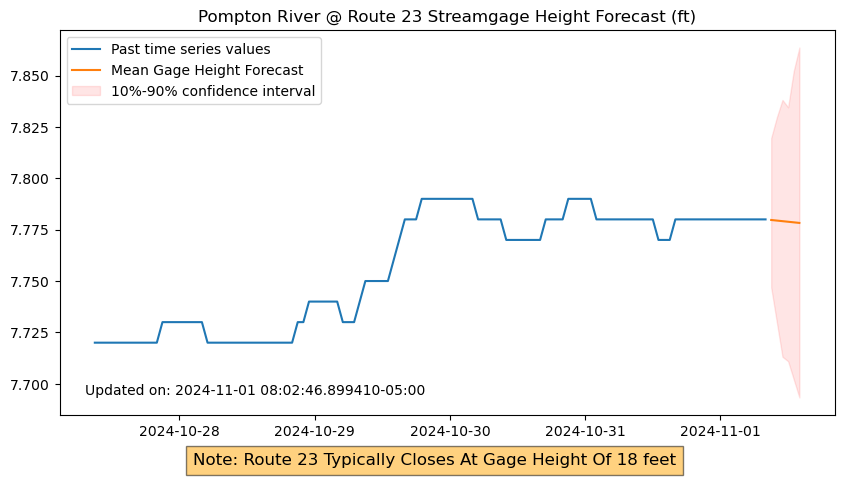

In [83]:
item_id = 'pompton_gage'

plt.figure(figsize=(10, 5))
plt.title('Pompton River @ Route 23 Streamgage Height Forecast (ft)')


y_past = test_data.loc[item_id]
y_pred = predictions.loc[item_id]

plt.plot(y_past[-120:], label="Past time series values")
plt.plot(y_pred["mean"], label="Mean Gage Height Forecast")
#plt.plot(y_test, label="Future time series values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.figtext(0.5, 0.01, "Note: Route 23 Typically Closes At Gage Height Of 18 feet", ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.15, 0.15, 'Updated on: '+str(current_dateTime), ha='left', fontsize=10)
plt.legend(loc = 'upper left');
plt.savefig('pompton-gage-forecast.png')

In [84]:
print(current_dateTime)

2024-11-01 08:02:46.899410-05:00
